In [2]:
from sentence_transformers import SentenceTransformer
from PIL import Image
import glob
import os

model = SentenceTransformer('clip-ViT-B-32')

print("✅ Model Loaded")

modules.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/604 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

0_CLIPModel/pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


✅ Model Loaded


In [3]:
folder_path = "data/images"
# Use glob to find all .jpg files in the folder
image_paths = glob.glob(os.path.join(folder_path,'*.jpg'))

image_sample = image_paths[:1000]

print(f"Found {len(image_paths)} images. Using a sample of {len(image_sample)} for this test.")
print(f"Example path: {image_sample[0]}")




Found 44441 images. Using a sample of 1000 for this test.
Example path: data/images/9733.jpg


In [4]:
def create_embeddings(image_paths):
    embeddings = model.encode(
        [Image.open(file_path) for file_path in image_sample],batch_size=32,convert_to_tensor=True,show_progress_bar=True
    )
    return embeddings
image_embeddings = create_embeddings(image_sample)

print("\n✅ Embeddings created.")
print(f"The shape of our embeddings is: {image_embeddings.shape}")
    

Batches:   0%|          | 0/32 [00:00<?, ?it/s]


✅ Embeddings created.
The shape of our embeddings is: torch.Size([1000, 512])


Query Image: data/images/24084.jpg


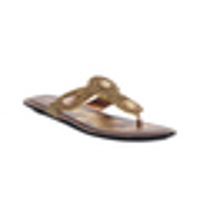

In [12]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

query_image_index = 5
query_path = image_sample[query_image_index]

query_embedding = image_embeddings[query_image_index]

similarities = cosine_similarity([query_embedding.cpu().numpy()], image_embeddings.cpu().numpy())[0]

top_indices = np.argsort(similarities)[-1:-6:-1]
print(f"Query Image: {query_path}")
Image.open(query_path).resize((200, 200))




Top 5 Similar Images:
- Path: data/images/24084.jpg, Similarity: 1.0000


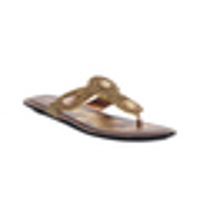

- Path: data/images/47537.jpg, Similarity: 0.9586


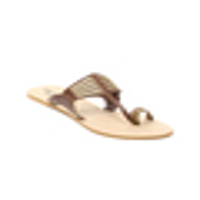

- Path: data/images/57308.jpg, Similarity: 0.9533


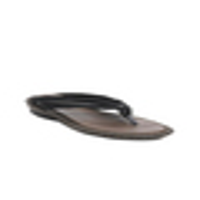

- Path: data/images/56943.jpg, Similarity: 0.9532


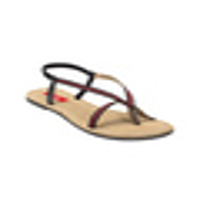

- Path: data/images/39566.jpg, Similarity: 0.9446


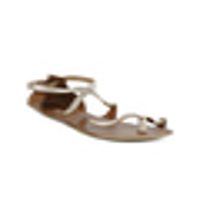

In [13]:
print("\nTop 5 Similar Images:")
for index in top_indices:
    # We print the path and the similarity score
    print(f"- Path: {image_sample[index]}, Similarity: {similarities[index]:.4f}")
    display(Image.open(image_sample[index]).resize((200,200)))